In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


Iris Flower Machine Learning Visualization

**import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 **Read in the dataset**

In [3]:
flower = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
flower.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# viewing ststs of the data 
print(flower.shape)
flower.describe()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Data Preprocessing**

In [5]:
# view all samples and species of the Iris flower. Can also be viewed like flower.species.value_counts()
flower['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
# basic data type information
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# check for null values
flower.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Data Visualization**

<AxesSubplot:>

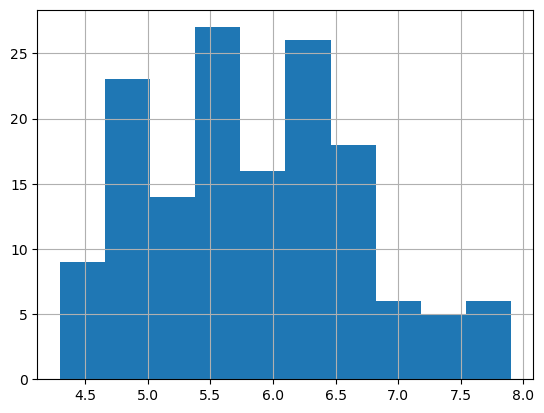

In [8]:
# Histograms
flower['sepal_length'].hist()

<AxesSubplot:>

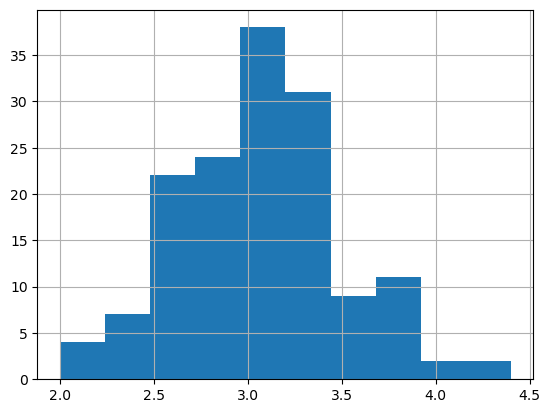

In [9]:
flower['sepal_width'].hist()

<AxesSubplot:>

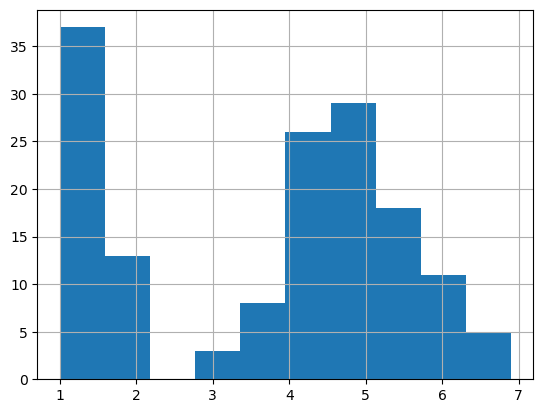

In [10]:
flower['petal_length'].hist()

<AxesSubplot:>

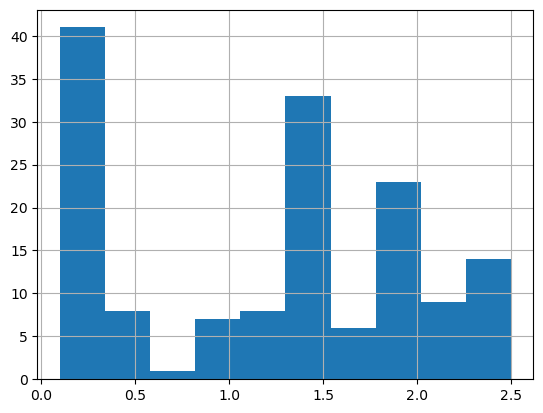

In [11]:
 flower['petal_width'].hist()

In [12]:
# Scatter plots. Plotting a scatter plot for each specie of flower
# define the colours to differentiate each specie
colour = ['black', 'purple', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

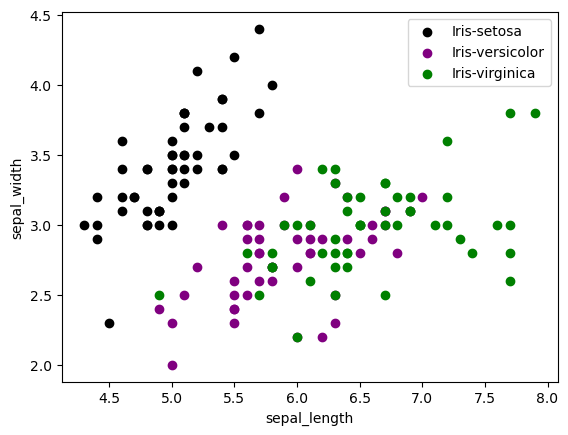

In [13]:
for i in range (3):
    x = flower[flower['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colour[i], label = species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
    
#sepal_length 
#sepal_width
#petal_length
#petal_width

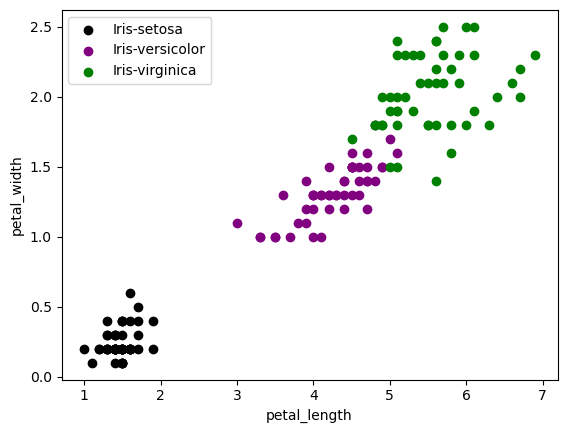

In [14]:
for i in range (3):
    x = flower[flower['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colour[i], label = species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

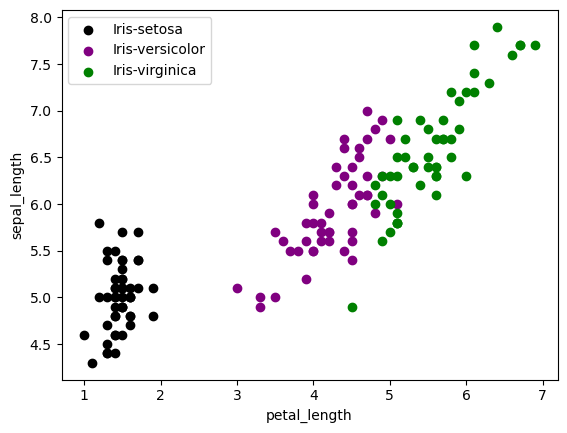

In [15]:
for i in range (3):
    x = flower[flower['species'] == species[i]]
    plt.scatter(x['petal_length'], x['sepal_length'], c = colour[i], label = species[i])
plt.xlabel('petal_length')
plt.ylabel('sepal_length')
plt.legend()

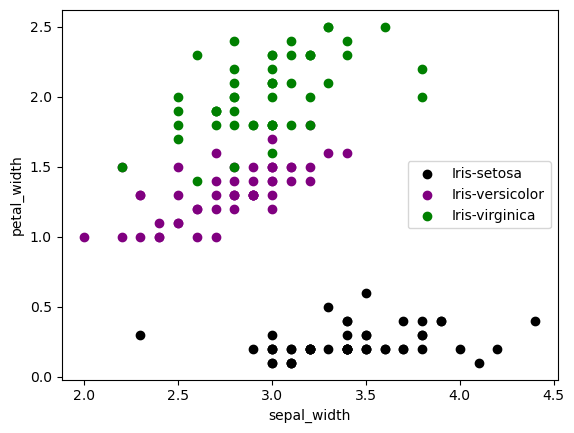

In [16]:
for i in range (3):
    x = flower[flower['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colour[i], label = species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

In [17]:
#correlation matrix
flower.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

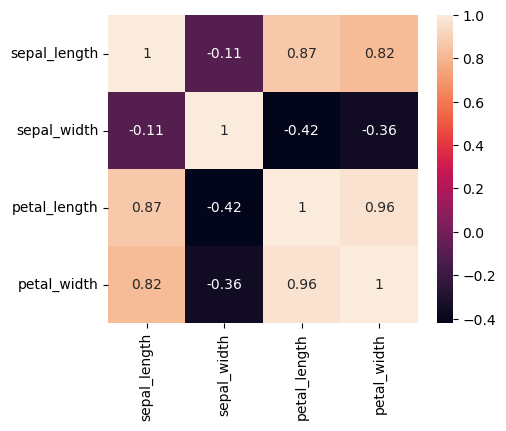

In [18]:
corr = flower.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot = True, ax = ax)

**Label Encoding**

Convert labels in form of categorical variables (string) to numeric form for machine readability.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [20]:
flower['species'] = le.fit_transform(flower['species'])
flower.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


**Model Training**

In [21]:
from sklearn.model_selection import train_test_split
x = flower.drop(columns=['species'])
y = flower['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [24]:
#model accuracy
print(model.score(x_test, y_test))

0.9555555555555556


In [25]:
# knn k-nearest neigbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [26]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
#model accuracy
print(model.score(x_test, y_test))

0.9555555555555556


In [28]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [29]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
print(model.score(x_test, y_test))

0.8888888888888888
